In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3220 - val_acc: 0.8806
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.1030 - acc: 0.9691 - val_loss: 0.3045 - val_acc: 0.8847
Epoch 8/20
15000/15000 [==============================] - 1s 

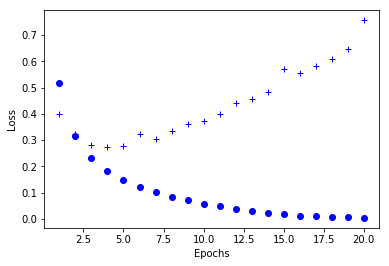

In [10]:
history_dict = history.history

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [11]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s - loss: 0.2329 - acc: 0.9471     
Epoch 2/4
25000/25000 [==============================] - 1s - loss: 0.1388 - acc: 0.9585     
Epoch 3/4
25000/25000 [==============================] - 1s - loss: 0.1108 - acc: 0.9671     
Epoch 4/4
24928/25000 [============================>.] - ETA: 0s

In [12]:
model.predict(x_test)

array([[  9.76888478e-01],
       [  8.34702551e-01],
       [  9.99944091e-01],
       ..., 
       [  4.98647898e-01],
       [  1.99251328e-04],
       [  7.96868980e-01]], dtype=float32)

In [13]:
### Tests

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5187 - acc: 0.7666 - val_loss: 0.3896 - val_acc: 0.8618
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3052 - acc: 0.9028 - val_loss: 0.3245 - val_acc: 0.8731
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2209 - acc: 0.9302 - val_loss: 0.2779 - val_acc: 0.8890
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1725 - acc: 0.9449 - val_loss: 0.2848 - val_acc: 0.8871
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1378 - acc: 0.9565 - val_loss: 0.2831 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1141 - acc: 0.9644 - val_loss: 0.3024 - val_acc: 0.8859
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.0932 - acc: 0.9729 - val_loss: 0.3284 - val_acc: 0.8773
Epoch 8/20
15000/15000 [==============================] - 1s 

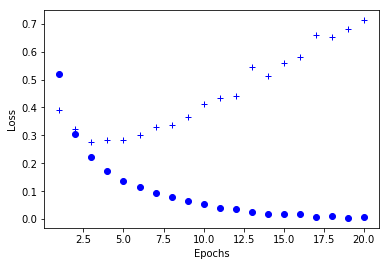

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()